## Q1:

### The difference between the standard deviation and the standard error of the mean are that the standard deviation evaluates the discrete extent of the certain sample from the population, while the standard error of the mean evaluates how the mean of the sample is close to the mean of the population.

### The standard deviation captures the idea of distribution range of the sample, and the standard error of the mean captures the idea of the reliability of the mean of the sample.

Summary: 

In our conversation, we discussed the difference between standard deviation (SD) and standard error of the mean (SEM):

Standard Deviation (SD) measures the spread or variability of data points within a dataset. It reflects how much individual data points deviate from the mean, giving a sense of the overall distribution and variability within the data.

Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean. It indicates how much the sample mean would vary if multiple samples were taken, and it decreases as the sample size increases.

The key distinction is that SD captures the variability within the dataset itself, while SEM captures the uncertainty or precision of the sample mean as a representation of the population mean.

Link: https://chatgpt.com/share/66fdcbb7-80cc-8003-9582-dea0c03862a6

## Q2:

### To create a 95% confidence interval which covers 95% of the bootstrapped sample using the standard error of the mean, we need to first calculate the mean of original data. Then take several samples and calculate their means. Then calculate the standard error of the mean. After that, we use the mean of original data minus 2 times SEM as the left bound of the confidence interval and the mean of original data plus 2 times SEM as the right bound of the confidence interval to construct the confidence interval.

Summary:

You asked how to use the standard error of the mean (SEM) to create a 95% confidence interval that covers 95% of the bootstrapped sample means. I explained the steps:

Calculate the SEM, which is the standard deviation of the sample divided by the square root of the sample size.

Find the critical value for 95% confidence, which is approximately 1.96 for a normal distribution.

Compute the confidence interval using the formula:
CI
=
𝑥
ˉ
±
(
1.96
×
SEM
)
CI= 
x
ˉ
 ±(1.96×SEM)
where 
𝑥
ˉ
  is the sample mean.

The resulting confidence interval will cover 95% of the bootstrapped sample means if the distribution of sample means is approximately normal.
This interval will contain the true population mean 95% of the time across different samples.

Link:https://chatgpt.com/share/66fdd3a5-cabc-8003-817c-641d5b65db63

## Q3:

### To create a 95% bootstrapped confidence interval using the bootstrapped means, we need to first take a lot of samples from original data. Then calculate the mean of every sample. Then we sort the means in ascending order. After that, we find the 2.5th percentile and 97.5th percentile of the means, which bounded the confidence interval.

Summary:

In this conversation, you asked about how to create a 95% bootstrapped confidence interval using bootstrapped means, without relying on the standard deviation to estimate the standard error of the mean. I explained the process step-by-step, which involves resampling data with replacement, computing the means for each resample, sorting the bootstrapped means, and then identifying the 2.5th and 97.5th percentiles of those means to form the confidence interval.

Link:https://chatgpt.com/share/66fdddf5-0fd0-8003-8685-d393ad02b1de

## Q4:

In [7]:
import numpy as np

# Step 1: Create a sample (for example, a random sample of 30 data points from a normal distribution)
np.random.seed(42)  # Set seed for reproducibility
sample = np.random.normal(loc=50, scale=10, size=30)  # Mean 50, standard deviation 10, sample size 30

# Step 2: Define a function to generate bootstrap samples and compute bootstrap means
def bootstrap_ci(sample, num_bootstrap=1000, ci_level=95):
    # Generate bootstrap samples
    bootstrap_means = []
    for _ in range(num_bootstrap):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))

    # Calculate the confidence interval
    lower_percentile = (100 - ci_level) / 2
    upper_percentile = ci_level + lower_percentile
    ci_lower = np.percentile(bootstrap_means, lower_percentile)
    ci_upper = np.percentile(bootstrap_means, upper_percentile)

    return ci_lower, ci_upper

# Step 3: Calculate the 95% bootstrap confidence interval
ci_lower, ci_upper = bootstrap_ci(sample)

print(f"Sample Mean: {np.mean(sample):.2f}")
print(f"95% Bootstrap Confidence Interval for the Mean: ({ci_lower:.2f}, {ci_upper:.2f})")


Sample Mean: 48.12
95% Bootstrap Confidence Interval for the Mean: (44.80, 51.32)


Summary:

Here's a summary of our conversation:

You asked for code to produce a 95% bootstrap confidence interval for a population mean based on a sample. I provided a Python example that:

Creates a random sample of 30 data points from a normal distribution.
Uses bootstrapping (resampling with replacement) to generate means for multiple resampled datasets.
Calculates the 95% confidence interval by finding the 2.5th and 97.5th percentiles of the bootstrap means.
Displays both the sample mean and the 95% bootstrap confidence interval.
This approach allows you to estimate the population mean's confidence interval using resampling methods.

Link:https://chatgpt.com/share/66fde06a-4520-8003-badc-ddf00551486c

## Q5:

### We need to distinguish between the role of the population parameter and the sample statistic when it comes to confidence intervals because typically the sample statistic is computable and can be used to analyse the population, while population parameter is used to describe the population and is incomputable.

Summary:

We discussed the importance of distinguishing between the population parameter and the sample statistic when dealing with confidence intervals. The population parameter represents the true value we aim to estimate (like the population mean), while the sample statistic is an estimate based on the data from a sample. Confidence intervals are constructed around the sample statistic to provide a range of values that likely contain the true population parameter, accounting for uncertainty due to sample variability. The distinction helps clarify that the interval reflects uncertainty in the population parameter, not the sample statistic.

Link:https://chatgpt.com/share/66fde877-9884-8003-8010-b40fda2f35a6

## Q6:

### 1. The process of bootstrapping is that we find a general sample from the population, then take a lot of samples from the general sample, whose elements can be repeated and are chosen randomly, then we calculate the statistics we want to analyse, and we repeat this process for many times to use the distribution of the statistics to indicate the distribution of the population.

### 2. The main purpose of bootstrapping is to infer the distribution of the population by using the statistics of multiple samples generated by choosing randomly for a lot of times.

### 3. I will randomly take many other samples with the size of n, and calculate their means and get the distribution of the means, then I will check whether my hypothesis is in the confidence interval. If it is in the confidence interval, then my guess might be plausible, otherwise, my guess might be implausible.

## Q7:

#### Since the variability of samples may be strong, or the quantity of samples is too small, thus, a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero.

## Q8:

#### Null Hypothesis: The vaccine has no effect on patients.
#### H0: FinalHealthScore - InitialHealthScore = 0

In [1]:
import pandas as pd

data = {"PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]}

df = pd.DataFrame(data)

df['difference'] = df.FinalHealthScore - df.InitialHealthScore

df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,difference
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


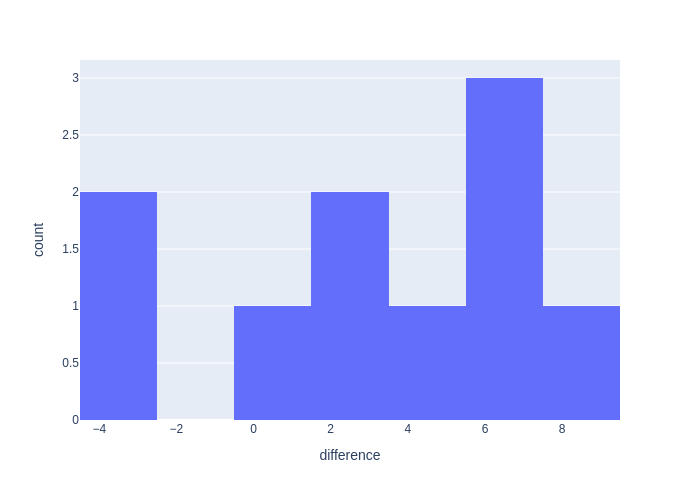

In [2]:
import plotly.express as px
fig = px.histogram(df, x = 'difference', nbins = 10)
fig.show(renderer="png")

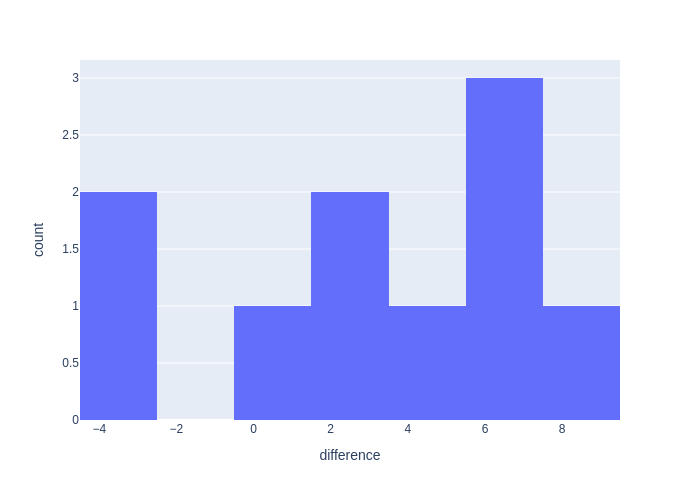

In [5]:
import numpy as np
n = 10000
bootstrap_mean = np.zeros(n)

np.random.seed(1)

for i in range(n):
    bootstrap_sample = np.random.choice(df.difference, size = len(df.difference), replace = True)
    bootstrap_mean[i] = np.mean(bootstrap_sample)
px.histogram(pd.DataFrame({'x':bootstrap_mean}),x = 'x')
fig.show(renderer="png")

In [6]:
np.quantile(bootstrap_mean,[0.025,0.975])

array([0.8, 5.6])

#### Since 0 is not in the interval above, we reject H0. Thus the vaccine is effective.